In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.data', header=None)
X = data.iloc[:, :4].to_numpy()
labels = data.iloc[:, 4].to_numpy()
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(np.count_nonzero(y_test != y_pred)) 

3


In [2]:
print(f'Точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Точность классификации 96.0%


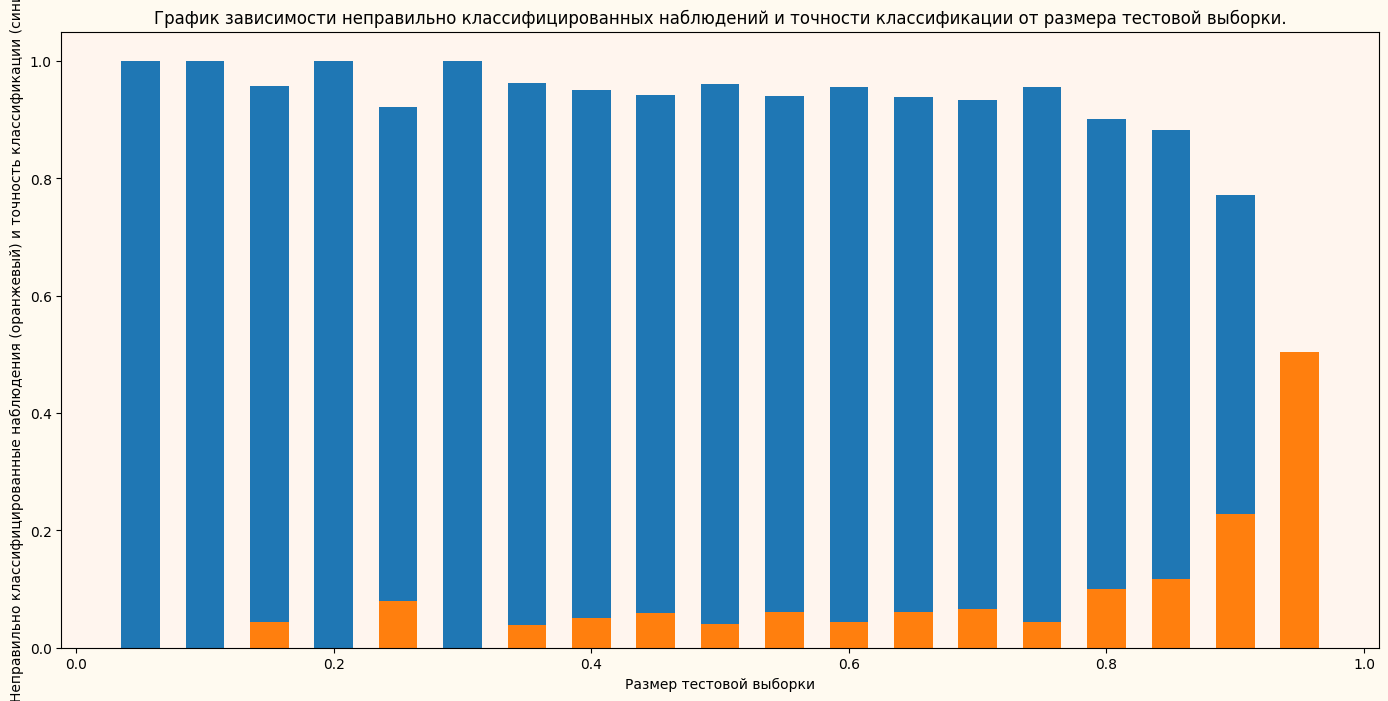

In [3]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')
plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки.',
    fontweight=12)

plt.show()

In [4]:
from sklearn.naive_bayes import MultinomialNB

print(
    'Мультиномиальный классификатор Naive Bayes подходит для классификации с дискретными признаками (например, количество слов для классификации текста). Мультиномиальное распределение обычно требует целочисленного количества признаков.',
    end='\n\n')

clf = MultinomialNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, который были неправильно определены {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Мультиномиальный классификатор Naive Bayes подходит для классификации с дискретными признаками (например, количество слов для классификации текста). Мультиномиальное распределение обычно требует целочисленного количества признаков.

Количество наблюдений, который были неправильно определены 50
Точность классификации 65.03496503496503%


In [5]:
from sklearn.naive_bayes import ComplementNB

print(
    'Классификатор Complement Naive Bayes был разработан для исправления "серьезных допущений", сделанных стандартным классификатором Multinomial Naive Bayes. Он особенно подходит для несбалансированных наборов данных.',
    end='\n\n')

clf = ComplementNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, который были неправильно определены {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Классификатор Complement Naive Bayes был разработан для исправления "серьезных допущений", сделанных стандартным классификатором Multinomial Naive Bayes. Он особенно подходит для несбалансированных наборов данных.

Количество наблюдений, который были неправильно определены 50
Точность классификации 65.03496503496503%


In [6]:
from sklearn.naive_bayes import BernoulliNB

print(
    'Как и MultinomialNB, этот классификатор подходит для дискретных данных. Разница в том, что если MultinomialNB работает с подсчетами вхождений, то BernoulliNB предназначен для бинарных/булевых признаков.',
    end='\n\n')

clf = BernoulliNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, который были неправильно определены {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Как и MultinomialNB, этот классификатор подходит для дискретных данных. Разница в том, что если MultinomialNB работает с подсчетами вхождений, то BernoulliNB предназначен для бинарных/булевых признаков.

Количество наблюдений, который были неправильно определены 97
Точность классификации 32.16783216783217%


In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(np.count_nonzero(y_test != y_pred))

50


In [8]:
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Точность классификации 65.03496503496503%


In [9]:
print(f'Количество листьев: {clf.get_n_leaves()}')
print(f'Глубина: {clf.get_depth()}')

Количество листьев: 2
Глубина: 1


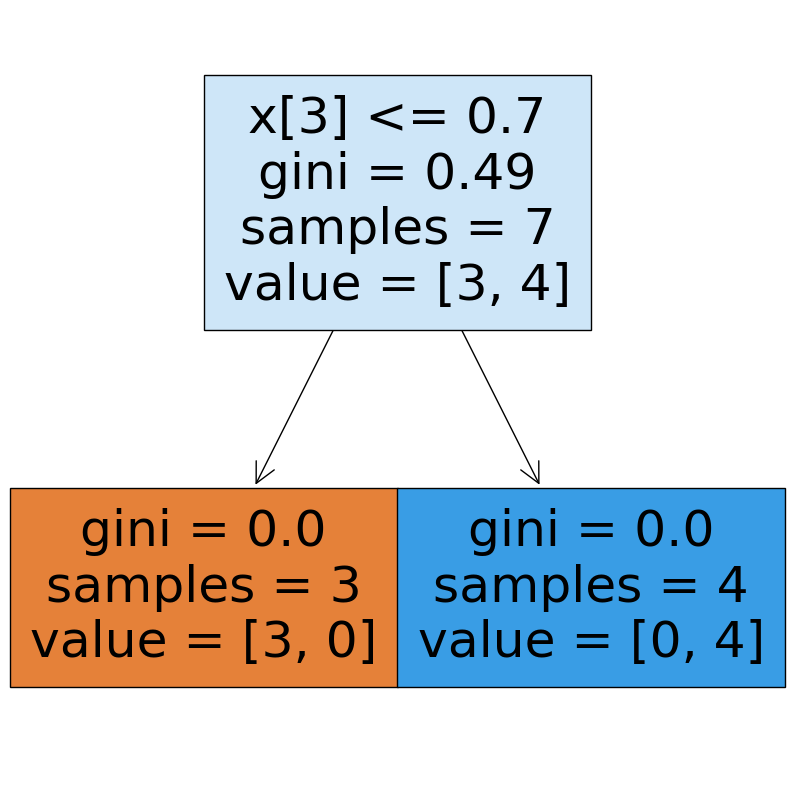

In [10]:
import matplotlib.pyplot as plt

plt.subplots(1, 1, figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()


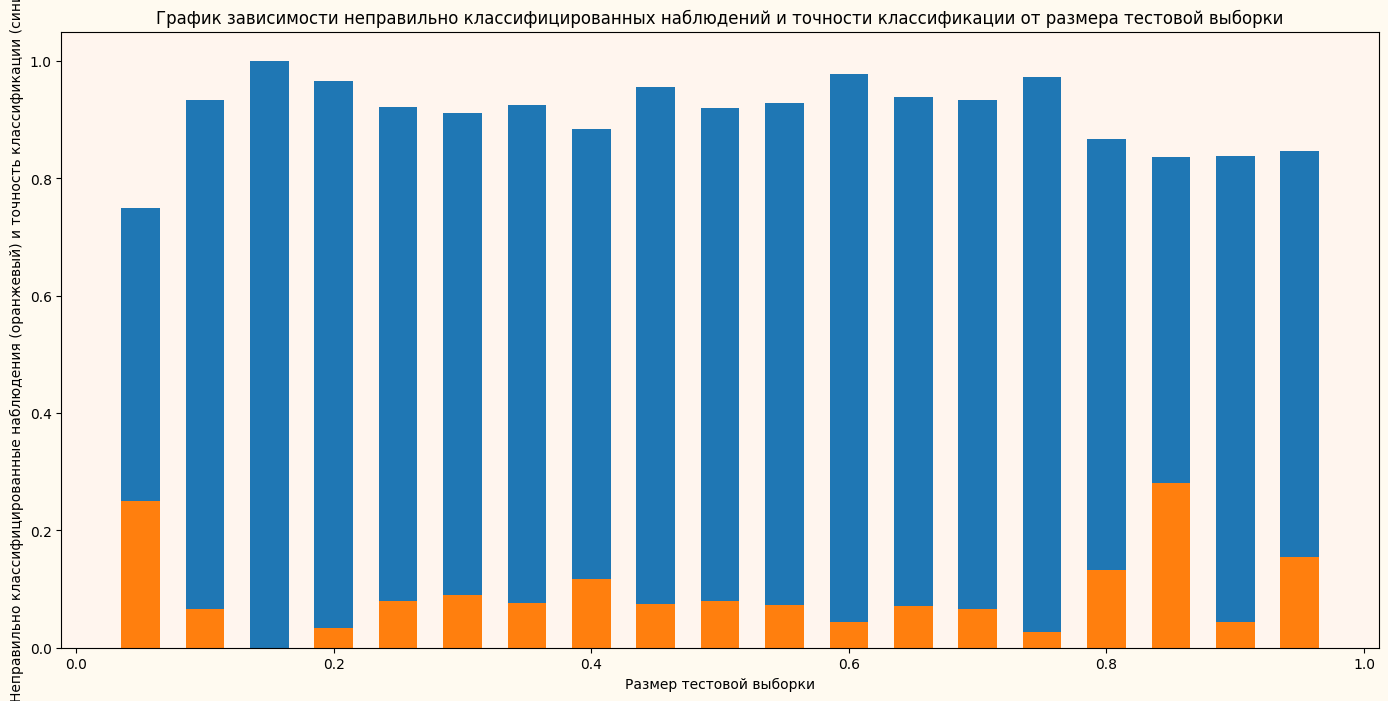

In [11]:
size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = tree.DecisionTreeClassifier()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки',
    fontweight=12)

plt.show()

In [12]:
from random import randint

criterion_parameters = ('gini', 'entropy', 'log_loss')
splitter_parameter = ('best', 'random')
for parameter in criterion_parameters:
    sp_par_random = splitter_parameter[randint(0, 1)]
    max_dp_random = randint(5, 40)
    min_samples_split_random = randint(5, 40)
    min_samples_leaf_random = randint(5, 40)

    gnb = tree.DecisionTreeClassifier(criterion=parameter, splitter=sp_par_random, max_depth=max_dp_random,
                                      min_samples_split=min_samples_split_random,
                                      min_samples_leaf=min_samples_leaf_random)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print(
        f'При criterion: {parameter}, splitter: {sp_par_random}, max_depth: {max_dp_random}, min_samples_split: {min_samples_split_random}, min_samples_leaf: {min_samples_leaf_random} \n точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%, количество листьев: {gnb.get_n_leaves()}, глубина: {gnb.get_depth()}\n')


При criterion: gini, splitter: best, max_depth: 20, min_samples_split: 29, min_samples_leaf: 34 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

При criterion: entropy, splitter: random, max_depth: 21, min_samples_split: 17, min_samples_leaf: 21 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

При criterion: log_loss, splitter: random, max_depth: 39, min_samples_split: 13, min_samples_leaf: 13 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

